<a href="https://colab.research.google.com/github/soyeunju/ESAA/blob/main/25-1/Assignments/0321_Week3_HM_HOM_UnsupervisedLearning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 9.2 가우시안 혼합
Gausian mixture model은 샘플이 파라미터가 알려지지 않은 **여러 개의 혼합된 가우시안 분포**에서 생성되었다고 가정하는 확률 모델.

하나의 가우시안 분포에서 생성된 모든 샘플은 하나의 클러스터를 형성(타원의 모양, 크기, 밀집도, 방향이 다 다름).

📊 가우시안 혼합 모델

* 샘플마다 k개의 클러스터에서 랜덤하게 한 클러스터 선택. j번째 클러스터를 선택할 확률은 클러스터의 가중치 $ϕ^{(j)}$로 정의. i번째 샘플을 위해 선택한 클러스터 인덱스는 $z^{(i)}$로 표시
* $z^{(i)}$ = $j$이면, 즉 $i$ 번째 샘플이 $j$번째 클러스터에 할당되었다면, 이 샘플의 위치 $x^{(i)}$는 평균이 $μ^{(j)}$, 공분산 행렬이 $Σ^{(j)}$인 가우시안 분포에서 랜덤하게 샘플링 됨. ($x^{(i)}$~N($μ^{(j)}$, $Σ^{(j)}$))

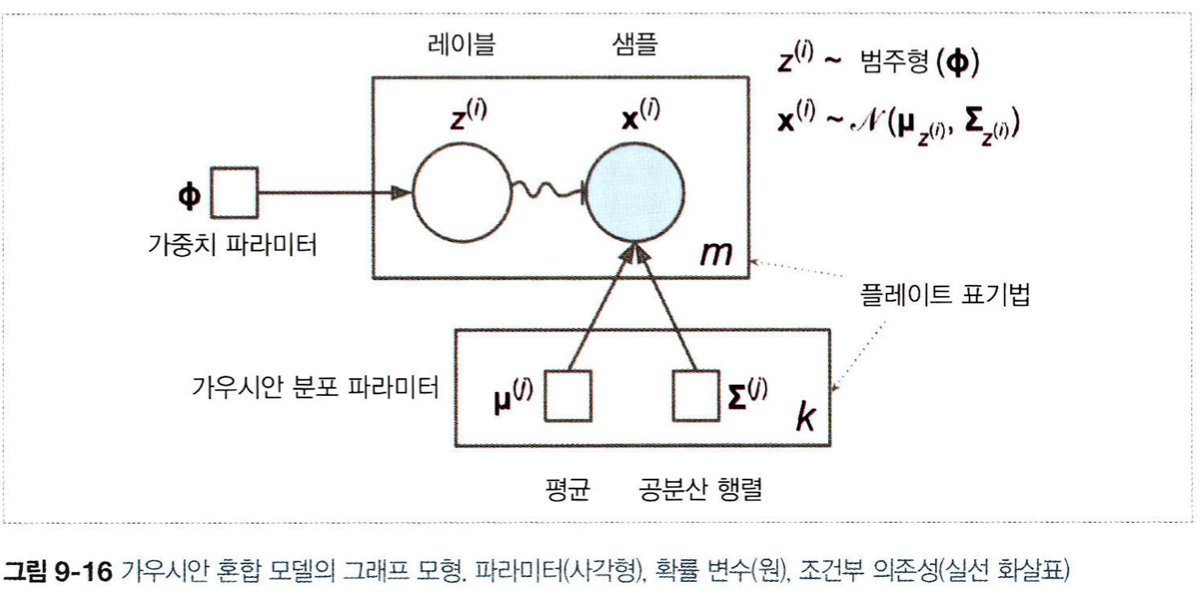

📊 기댓값 최대화 알고리즘(EM): 클러스터 파라미터를 랜덤하게 초기화하고 수렴할 때까지 두 단계를 반복

1) 샘플을 클러스터에 할당(기댓값 단계)

2) 클러스터를 업데이트(최대화 단계)

(EM)은 클러스터 중심뿐만 아니라 크기, 모양, 방향과 클러스터의 상대적 가중치를 찾는 K-평균의 일반화로 생각할 수 있음(소프트 클러스터 할당).

In [1]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000,noise=0.05)

In [2]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [3]:
gm.weights_

array([0.59090906, 0.21152845, 0.19756249])

In [4]:
gm.means_

array([[ 0.51489562,  0.2327272 ],
       [-0.72502097,  0.57180156],
       [ 1.7586169 , -0.04966464]])

In [5]:
gm.covariances_

array([[[ 0.16856593, -0.10103381],
        [-0.10103381,  0.29135436]],

       [[ 0.06158089,  0.06698791],
        [ 0.06698791,  0.08850528]],

       [[ 0.04667719,  0.05677904],
        [ 0.05677904,  0.08522355]]])

In [6]:
gm.converged_

True

In [7]:
gm.n_iter_

16

In [8]:
gm.predict(X)

array([0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 2, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 1, 0, 2, 2, 1,
       0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 2, 0, 0, 0, 1,
       0, 0, 2, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       2, 2, 1, 1, 1, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 1, 2, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 2, 2, 0, 0, 0, 0, 2, 1, 1, 0, 2, 0, 1, 2,
       0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 1, 2, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 1, 1, 0,

In [9]:
gm.predict_proba(X)

array([[9.99793240e-001, 2.06759546e-004, 1.05785159e-144],
       [1.00000000e+000, 6.00383964e-046, 4.99835026e-048],
       [1.00000000e+000, 1.50628021e-017, 3.84309555e-094],
       ...,
       [8.28298312e-001, 1.71701688e-001, 2.90621673e-169],
       [2.34585683e-001, 7.65414317e-001, 3.45811441e-185],
       [9.99998684e-001, 3.32186921e-126, 1.31628401e-006]])

In [10]:
X_new, y_new = gm.sample(6)

In [11]:
X_new

array([[ 0.47310797,  0.17165381],
       [ 0.45719906, -0.13136031],
       [-0.11054839,  0.90932839],
       [-0.52653963,  0.7866588 ],
       [-0.44893036,  0.97187991],
       [-0.61335579,  0.71723982]])

In [12]:
y_new

array([0, 0, 0, 1, 1, 1])

In [13]:
gm.score_samples(X)

array([-1.89465631e+00, -1.37648533e+00, -1.76276232e+00, -1.70835715e+00,
       -1.70201605e+00, -2.16576551e+00, -1.73080091e+00, -1.44398539e+00,
       -6.57669683e-01, -4.57246970e-01, -2.05098237e+00, -1.96355494e+00,
       -2.05014664e+00, -5.37200715e-01, -2.36146467e+00, -1.41521911e+00,
       -1.44371577e+00, -6.24654280e-01, -1.35421744e+00, -1.65621032e+00,
       -1.07688655e+00, -1.69278047e+00, -1.51693667e+00, -2.50271247e+00,
       -8.34178220e-01, -9.29517932e-01, -1.07597746e+00, -1.92190014e+00,
       -3.87399771e-01, -1.76333933e+00, -7.06915433e-01, -1.25534134e+00,
       -1.95295552e+00, -1.34465599e+00, -1.67932328e+00, -1.96601073e+00,
       -1.74435327e+00, -1.70249395e+00, -5.66621948e-02, -1.45518006e+00,
       -1.57734410e+00, -1.65278657e+00, -1.85694669e+00, -1.78035118e+00,
       -1.70416392e+00,  3.37016765e-03, -3.26684404e-01, -3.26187836e-01,
       -2.01176732e+00, -1.69986679e-01, -1.31677201e+00, -1.35723818e+00,
       -1.29049275e+00, -

특성이나 클러스터가 많거나 샘플이 적을 때는 EM이 최적의 솔루션으로 수렴하기 어려움 ➡️ 여러움을 줄이려면 알고리즘이 학습할 파라미터의 개수를 제한

`convarianve_type` 매개변수 값 설정 (기본값은 `full`)

* spherical: 모든 클러스터가 원형이나 지름은 다를 수 있음(분산이 다름)
* diag: 클러스터는 크기에 상관없이 어떤 타원형도 가능하지만 타원의 축은 좌표축과 나란해야 함(공분산 행렬이 대각 행렬이어야 함.)
* tied: 모든 클러스터가 동일한 타원 모양, 크기, 방향을 가짐(즉 모든 클러스터는 동일한 공분산 행렬을 공유)

####9.2.1 가우시안 혼합을 사용한 이상치 탐지

- 이상치 탐지: 보통(정상치)와 다른 샘플을 감지. 부정거래 감지, 결함제품 감지, 훈련 전 데이터셋 이상치 제거, 데이터 정제

- 가우시안 혼합 모델에서는 밀도가 낮은 지역의 모든 샘플을 이상치로 추정. 밀도 임곗값(%)을 설정 후 밀도 낮은 지역의 샘플을 얻음. 거짓양성이 많다면 임곗값을 더 낮추고 거짓음성이 너무 많으면 임곗값을 높임.

- 특이치 탐지: 이상치로 오염되지 않은 깨끗한 데이터셋 사용



In [18]:
# 9.2.1
import numpy as np
densities = gm.score_samples(X)
density_threshold = np.percentile(densities,4)
anomalies = X[densities < density_threshold]

####9.2.2 클러스터 개수 선택하기

- k평균에서는 이너셔나 실루엣 점수를 사용하지만 가우시안 혼합에서는 지표를 사용하지 않고 AIC, BIC와 같은 이론적 정보 기준을 최소화하는 모델을 찾음
- BIC/AIC: 클러스터가 많은 모델에 벌칙을 가하고 잘 학습하는 모델에 보상 함. BIC가 더 간단한 모델이지만 데이터에 잘 맞지 않을 수 있음

* $BIC = log(m)p-2*log(\hat{L})$

* $AIC = 2p-2*log(\hat{L})$
  - $m$:샘플 개수, $p$:학습할 파라미터 개수, $\hat{L}$: 가능도 함수 최댓값

In [19]:
# 9.2.2
gm.bic(X)

np.float64(2770.3072172858315)

In [20]:
gm.aic(X)

np.float64(2686.875377543135)

####9.2.3 베이즈 가우시안 혼합 모델(BayesianGaussianMixture)

최적의 클러스터 개수를 수동으로 찾지 않고 불필요한 클러스터 가중치를 0으로 만듦 (불필요한 클러스터 제거)
  - n_components에 예상 최적 클러스터 개수보다 큰 값을 지정
  - 클러스터 파라미터, 클러스터 할당 모두 잠재 확률 변수(z)로 취급

- 베타 분포: 고정 범위 안에 놓인 값을 가진 확률 변수를 모델링할 때 사용 (범위 0~1)
- 잠재 변수 z에 대한 사전지식은 **사전 확률**(확률분포 $p(z)$)에 인코딩됨
  클러스터가 적거나 풍부할 것이라는 사전 믿음을 `weight_concentration_prior`로 조정할 수 있음. 데이터가 많을수록 사전 믿음은 중요하지 않음
- 베이즈 정리: 데이터 X 관측 후, 잠재 변수에 대한 확률분포. 즉, X가 주어졌을 때 z의 조건부 확률인 **사후확률분포 p(z|X)** 계산
  
  $p(z|X) = \frac{p(X|z)p(z)}{p(X)} = \frac{가능도*사전확률}{증거}$
- 증거 $p(X)$를 계산하기는 어려움
  ➡️ 변분 추론: 자체적인 변분 파라미터 λ를 가진 분포 패밀리 선택 후, 사후 확률의 좋은 근삿값이 되도록 파라미터 최적화. 즉, KL발산을 최소화하는 λ 찾음.
  - KL발산을 최소화하려면 ELBO를 최대화.
  - 실전의 ELBO 최대화 방법:
    1. 평균장 변분 추론-ELBO식을 계산할 수 있는 형태로 단순화
    2. 블랙박스 확률적 변분 추론(BBSVI)- 각 반복에서 몇 개의 샘플을 뽑아 λ에 대한 ELBO의 그레이디언트 추정하는 데 사용함. 경사 하강법 스텝에서 사용하므로 심층 신경망도 가능함(베이즈 딥러닝)

- 가우시안 혼합 모델은 타원형 클러스터에 잘 작동함. 다른 모양을 가진 데이터셋은 좋지 않음.

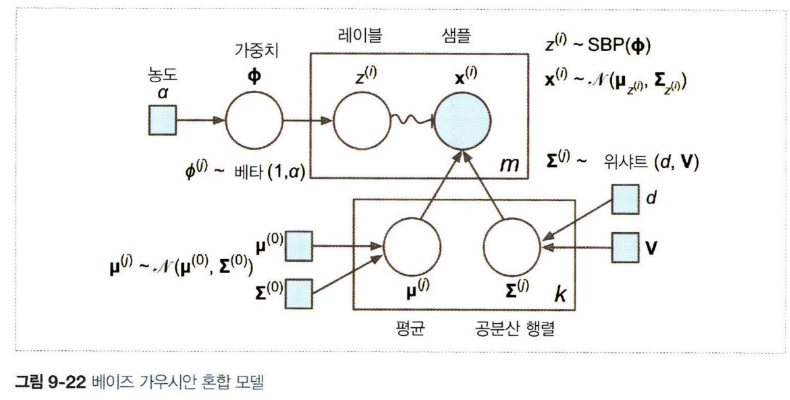


  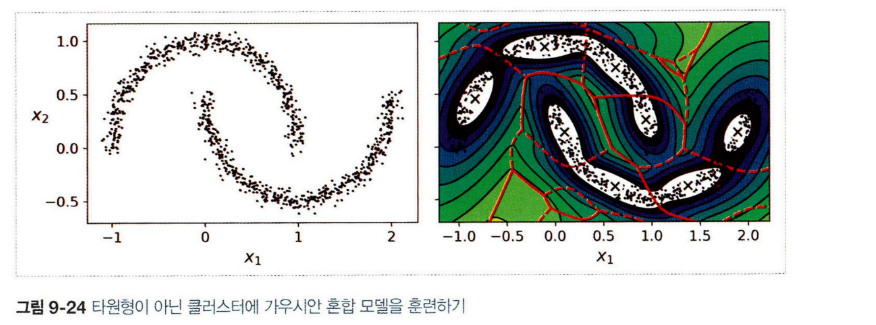



In [17]:
# 9.2.3
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_,2)

array([0.12, 0.17, 0.13, 0.15, 0.11, 0.12, 0.11, 0.1 , 0.  , 0.  ])

####9.2.4 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘

- PCA
- Fast-MCD: 샘플이 혼합된 것이 아닌 하나의 가우시안 분포에서 생성되었다고 가정. 타원형을 잘 추정함
- 아이솔레이션 포르세트: 고차원 데이터셋에서 효율적
- LOF: 주어진 샘플 주위의 밀도와 이웃 주위의 밀도 비교
- one-class SVM: 특이치 탐지. 원본 공간에서 고차원 공간의 샘플을 분리함